In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

In [4]:
datam = pd.read_csv("/your/path7/to/file").csv

In [5]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
datam.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
datam.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

<AxesSubplot:>

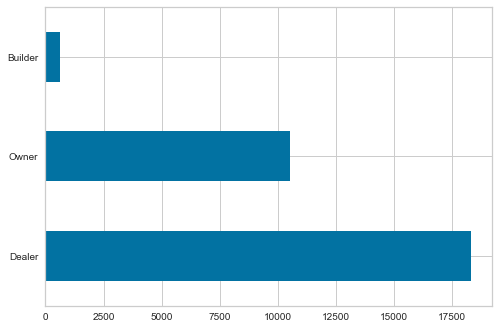

In [8]:
datam.POSTED_BY.value_counts().plot(kind= 'barh')

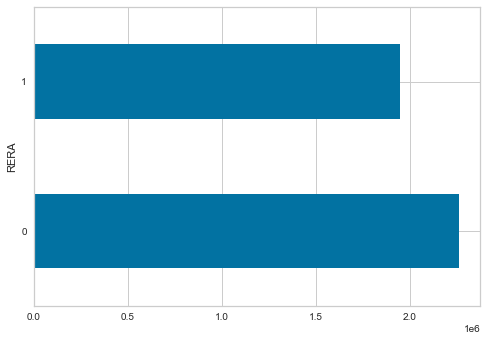

In [9]:
graph = datam.groupby('RERA').sum().iloc[:, -1].plot(kind='barh')

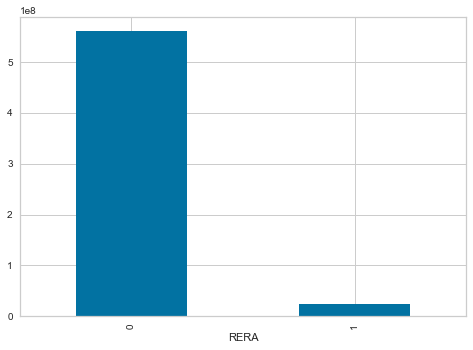

In [10]:
graph = datam.groupby('RERA').sum().iloc[:, 2].plot(kind='bar')

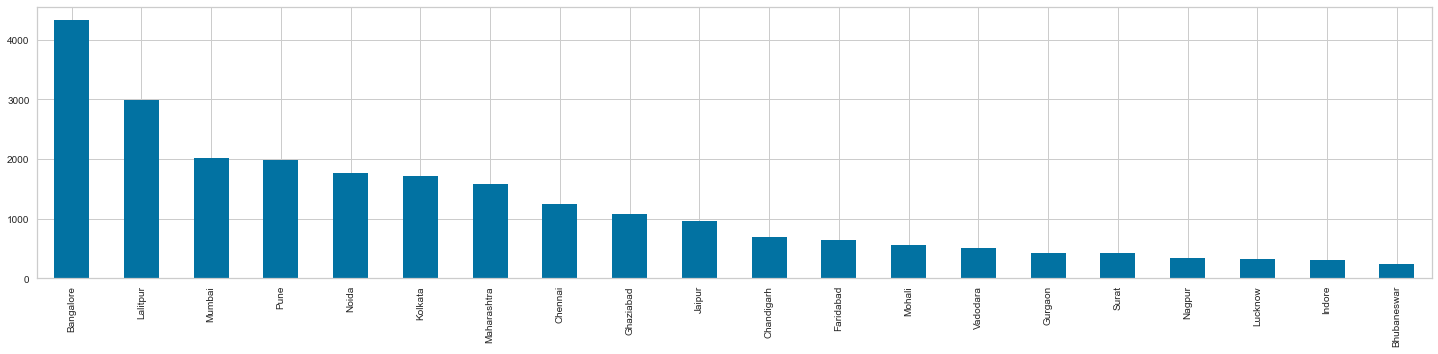

In [14]:
plt.figure(figsize = (25 ,5))

datam.ADDRESS = datam.ADDRESS.apply(lambda x : x.split(',')[-1])
datam.ADDRESS.value_counts()[:20].plot(kind='bar')
plt.show()

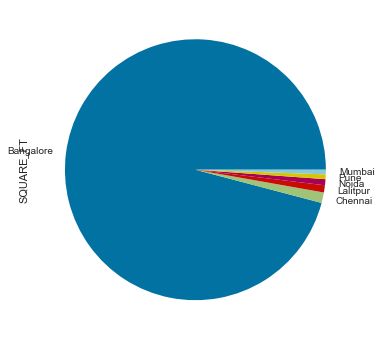

In [21]:
plt.figure(figsize=(25,6))
datam.groupby(['ADDRESS']).sum().SQUARE_FT.nlargest(6).plot(kind='pie')
plt.show()

In [22]:
datam['BHK_NO.'] = datam['BHK_NO.'].apply(lambda x: x if x < 5 else 5)
datam['BHK_NO.'].value_counts()

2    13324
3    10546
1     3574
4     1723
5      284
Name: BHK_NO., dtype: int64

In [24]:
enyüksek = datam.ADDRESS.value_counts().nlargest(8).index
datam.ADDRESS = datam.ADDRESS.apply(lambda x : x if x in enyüksek else 'Diğerlerinden')
datam.ADDRESS.value_counts()

Diğerlerinden    11794
Bangalore         4340
Lalitpur          2993
Mumbai            2023
Pune              1991
Noida             1767
Kolkata           1709
Maharashtra       1579
Chennai           1255
Name: ADDRESS, dtype: int64

In [25]:
datam.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Diğerlerinden,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Diğerlerinden,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [41]:
def label_encoder(datam, column_name):
    label_encoder = preprocessing.LabelEncoder()

    datam[column_name]= label_encoder.fit_transform(datam[column_name])
    print(column_name)
    for i in range(len(datam[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(datam[column_name].value_counts())
    print('-'*10)
    
    return datam[column_name], label_encoder
        

In [42]:
datam['POSTED_BY'], label_encoder_posted_by = label_encoder(datam, 'POSTED_BY')
datam['BHK_OR_RK'], label_encoder_posted_by = label_encoder(datam, 'BHK_OR_RK')
datam['ADDRESS'], label_encoder_posted_by = label_encoder(datam, 'ADDRESS')

POSTED_BY
For 0 : ['Builder']
For 1 : ['Dealer']
For 2 : ['Owner']
----------
1    18291
2    10538
0      622
Name: POSTED_BY, dtype: int64
----------
BHK_OR_RK
For 0 : ['BHK']
For 1 : ['RK']
----------
0    29427
1       24
Name: BHK_OR_RK, dtype: int64
----------
ADDRESS
For 0 : ['Bangalore']
For 1 : ['Chennai']
For 2 : ['Diğerlerinden']
For 3 : ['Kolkata']
For 4 : ['Lalitpur']
For 5 : ['Maharashtra']
For 6 : ['Mumbai']
For 7 : ['Noida']
For 8 : ['Pune']
----------
2    11794
0     4340
4     2993
6     2023
8     1991
7     1767
3     1709
5     1579
1     1255
Name: ADDRESS, dtype: int64
----------


In [43]:
X = datam.iloc[:, :-1]
y = datam.iloc[:, -1]

In [44]:
scaler = StandardScaler()
norm = Normalizer()

X_stand = scaler.fit_transform(X)
X_norm = norm.fit_transform(X)

In [45]:
X_stand_train, X_stand_test, y_stand_train, y_stand_test = train_test_split(X_stand, y, test_size=0.33, random_state=42)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
def modelim(name, model):
    classificationn = model.fit(X_train, y_train)
    classificationn_standardscaleolan = model.fit(X_stand_train, y_stand_train)
    classification_normalizeoolan = model.fit(X_norm_train, y_norm_train)
    y_tahminyaniyüssü = classificationn.predict(X_test)
    y_standardolanınüssü = classificationn_standardscaleolan.predict(X_stand_test)
    y_normalizeüssü = classification_normalizeoolan.predict(X_norm_test)
    print(name)
    print("Orjinali:")
    print("R2 : ",r2_score(y_test, y_tahminyaniyüssü))
    print("MSE : ",mean_squared_error(y_test, y_tahminyaniyüssü))
    print("-"*21)
    print("Yani:")
    print("R2 : ",r2_score(y_stand_test, y_standardolanınüssü))
    print("MSE : ",mean_squared_error(y_stand_test, y_standardolanınüssü))
    print("-"*7)
    print("Normalize:")
    print("R2 : ",r2_score(y_norm_test,y_normalizeüssü))
    print("MSE : ",mean_squared_error(y_norm_test, y_normalizeüssü))
    print("="*10)
    return classificationn, classificationn_standardscaleolan, classification_normalizeoolan

In [49]:
_,_, Linear = modelim("Linear Regression", LinearRegression())
_,_, Lasso = modelim("Lasso Regression", LassoCV(cv=10))
_,_, Ridge = modelim("Ridge Regression", RidgeCV((0.1, 1.0, 5.0, 10)))
_,_, ElasticNet = modelim("Elastic Net", ElasticNetCV(l1_ratio=0.5))
_,_, ElasticNet = modelim("Elastic Net", ElasticNetCV())
_,_, Gradient = modelim("Gradient", GradientBoostingRegressor())
_,_, AdaBoost = modelim("Ada", AdaBoostRegressor())

Linear Regression
Orjinali:
R2 :  -785072334658278.2
MSE :  3.488889316304246e+20
---------------------
Yani:
R2 :  -122616.27422374807
MSE :  54491551816.02362
-------
Normalize:
R2 :  0.05947034057078493
MSE :  417974.71845421294
Lasso Regression
Orjinali:
R2 :  -732365586769661.1
MSE :  3.2546586582009014e+20
---------------------
Yani:
R2 :  -55187.8727878385
MSE :  24526130924.25104
-------
Normalize:
R2 :  0.057831106011818845
MSE :  418703.2001096241
Ridge Regression
Orjinali:
R2 :  -383396337945594.2
MSE :  1.703826932012312e+20
---------------------
Yani:
R2 :  -786.1064722489459
MSE :  349792909.59457725
-------
Normalize:
R2 :  0.03920272690973681
MSE :  426981.71789201524
Elastic Net
Orjinali:
R2 :  -319615276.282841
MSE :  142038163492934.3
---------------------
Yani:
R2 :  -1.1284738917136243
MSE :  945901.3511238457
-------
Normalize:
R2 :  0.01278460525035452
MSE :  438722.02491154155
Elastic Net
Orjinali:
R2 :  -319615276.282841
MSE :  142038163492934.3
---------------

In [53]:
tahminediciler = [('Gradient', Gradient),('Support Vector Regression', AdaBoost)]
reg = StackingRegressor(estimators=tahminediciler, final_estimator=LinearRegression())
reg.fit(X_norm_train, y_norm_train)
y_normalizeüssü = reg.predict(X_norm_test)

In [55]:
print("Normalize edilmiş hali:")
print("R2 : ",r2_score(y_norm_test,y_normalizeüssü))
print("MSE : ",mean_squared_error(y_norm_test, y_normalizeüssü))
print("Kolaydı")

Normalize edilmiş hali:
R2 :  0.752082089648
MSE :  110175.59918527245
Kolaydı
